In [13]:
import pandas as pd

In [14]:
df=pd.read_csv("tennis.csv")
df

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
df_encoded =pd.get_dummies(df.drop('play', axis=1))
y = df['play'].apply(lambda x: 1 if x == 'yes' else 0)
X_train, X_test, y_train, y_test = train_test_split(df_encoded, y, test_size = 0.3, random_state=42 )
clf = DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [16]:
accuracy = metrics.accuracy_score(y_test, y_pred)
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
accuracy, conf_matrix

(0.6,
 array([[1, 1],
        [1, 2]], dtype=int64))

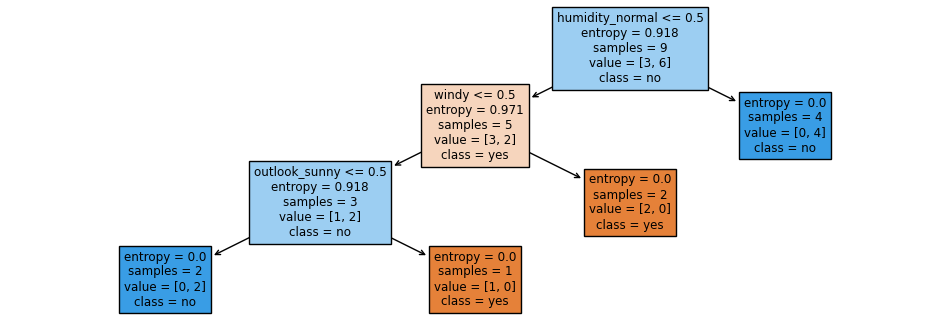

In [29]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
tree.plot_tree(clf, feature_names=df_encoded.columns, class_names=['yes', 'no'], filled=True)
plt.show()

In [21]:
import numpy as np
import pandas as pd

# Sample data provided
data = {
    'outlook': ['sunny', 'sunny', 'overcast', 'rainy', 'rainy', 'rainy', 'overcast', 'sunny', 'sunny', 'rainy', 'sunny', 'overcast', 'overcast', 'rainy'],
    'temp': ['hot', 'hot', 'hot', 'mild', 'cool', 'cool', 'cool', 'mild', 'mild', 'mild', 'cool', 'mild', 'hot', 'mild'],
    'humidity': ['high', 'high', 'high', 'high', 'normal', 'normal', 'normal', 'high', 'normal', 'normal', 'normal', 'high', 'normal', 'high'],
    'windy': [False, True, False, False, False, True, True, False, False, False, True, True, False, True],
    'play': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']
}

df = pd.DataFrame(data)

# Function to calculate entropy
def entropy(probs):
    return -sum(p * np.log2(p) for p in probs if p > 0)

# Function to calculate information gain
def information_gain(data, split_attribute, target_attribute='play'):
    total_entropy = entropy([len(data[data[target_attribute] == val]) / len(data) for val in data[target_attribute].unique()])
    
    values, counts = np.unique(data[split_attribute], return_counts=True)
    weighted_entropy = sum(
        (counts[i] / np.sum(counts)) * entropy([
            len(data[(data[split_attribute] == v) & (data[target_attribute] == val)]) / len(data[data[split_attribute] == v])
            for val in data[target_attribute].unique()
        ]) for i, v in enumerate(values)
    )
    
    return total_entropy - weighted_entropy

# Calculate information gain for each feature
features = ['outlook', 'temp', 'humidity', 'windy']
info_gain = {feature: information_gain(df, feature) for feature in features}
info_gain


{'outlook': 0.24674981977443933,
 'temp': 0.02922256565895487,
 'humidity': 0.15183550136234159,
 'windy': 0.04812703040826949}

In [24]:
import pandas as pd
import numpy as np
from tabulate import tabulate

# Sample dataset
data = {
    'outlook': ['sunny', 'sunny', 'overcast', 'rainy', 'rainy', 'rainy', 'overcast', 'sunny', 'sunny', 'rainy', 'sunny', 'overcast', 'overcast', 'rainy'],
    'temp': ['hot', 'hot', 'hot', 'mild', 'cool', 'cool', 'cool', 'mild', 'cool', 'mild', 'mild', 'mild', 'hot', 'mild'],
    'humidity': ['high', 'high', 'high', 'high', 'normal', 'normal', 'normal', 'high', 'normal', 'normal', 'normal', 'high', 'normal', 'high'],
    'windy': [False, True, False, False, False, True, True, False, False, False, True, True, False, True],
    'play': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']
}

df = pd.DataFrame(data)

# Function to calculate entropy
def entropy(probs):
    return -sum([p * np.log2(p) for p in probs if p > 0])

# Function to calculate entropy of a dataset
def entropy_of_dataset(data, target_attribute='play'):
    values, counts = np.unique(data[target_attribute], return_counts=True)
    probs = counts / counts.sum()
    return entropy(probs)

# Function to calculate information gain
def information_gain(data, split_attribute, target_attribute='play'):
    total_entropy = entropy_of_dataset(data, target_attribute)
    values, counts = np.unique(data[split_attribute], return_counts=True)
    
    # Calculate the weighted entropy for each split
    weighted_entropy = sum((counts[i] / np.sum(counts)) * 
                            entropy_of_dataset(data[data[split_attribute] == v], target_attribute)
                            for i, v in enumerate(values))
    
    # Information gain = Total entropy - Weighted entropy
    info_gain = total_entropy - weighted_entropy
    return info_gain

# List of features to calculate information gain
features = ['outlook', 'temp', 'humidity', 'windy']

# Initialize an empty list to store the results
results = []

# Calculate entropy and information gain for each feature
for feature in features:
    total_entropy = entropy_of_dataset(df)
    info_gain = information_gain(df, feature)
    results.append([feature, total_entropy, info_gain])

# Create a DataFrame to hold the results
results_df = pd.DataFrame(results, columns=['Feature', 'Entropy of Dataset', 'Information Gain'])

# Display the results as a table
print(tabulate(results_df, headers='keys', tablefmt='pretty', showindex=False))


+----------+--------------------+---------------------+
| Feature  | Entropy of Dataset |  Information Gain   |
+----------+--------------------+---------------------+
| outlook  | 0.9402859586706311 | 0.24674981977443933 |
|   temp   | 0.9402859586706311 | 0.02922256565895487 |
| humidity | 0.9402859586706311 | 0.15183550136234159 |
|  windy   | 0.9402859586706311 | 0.04812703040826949 |
+----------+--------------------+---------------------+


In [23]:
!pip install tabulate